In [276]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [277]:
df_emission = pd.read_csv(r'../../results/df_emission.csv')
df_emission

,Year,Result,Scenario,Strategy,dist_BEB,dist_CDB,dist_HEB,Label,YearlyResult,Yearly_dist_CDB,Yearly_dist_HEB,Yearly_dist_BEB,CO2e_CDB,CO2e_HEB,CO2e,YearlyResult100000gals,YearlyResult-1000gallons
0,2022,2738.750000,lo-cap,Status quo,674.998976,10965.000000,899.999000,Status quo,707460.738888,2.832426e+06,232483.416719,1.743625e+05,9155.839172,619.833953,9775.673124,7.074607,707.460739
1,2023,2738.750000,lo-cap,Status quo,674.998976,10965.000000,899.999000,Status quo,707460.738888,2.832426e+06,232483.416719,1.743625e+05,9155.839172,619.833953,9775.673124,7.074607,707.460739
2,2024,2738.750000,lo-cap,Status quo,674.998976,10965.000000,899.999000,Status quo,707460.738888,2.832426e+06,232483.416719,1.743625e+05,9155.839172,619.833953,9775.673124,7.074607,707.460739
3,2025,2738.750000,lo-cap,Status quo,674.998976,10965.000000,899.999000,Status quo,707460.738888,2.832426e+06,232483.416719,1.743625e+05,9155.839172,619.833953,9775.673124,7.074607,707.460739
4,2026,2738.750000,lo-cap,Status quo,674.998976,10965.000000,899.999000,Status quo,707460.738888,2.832426e+06,232483.416719,1.743625e+05,9155.839172,619.833953,9775.673124,7.074607,707.460739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,2031,1869.475807,lo-cap,Hybrid+Electric,3059.972316,6280.937131,3199.979539,lo-cap Hybrid+Electric,482914.006665,1.622461e+06,826603.336956,7.904373e+05,5244.619263,2203.842411,7448.461674,4.829140,482.914007
136,2032,1775.253148,lo-cap,Hybrid+Electric,3374.995608,5865.924205,3299.969174,lo-cap Hybrid+Electric,458574.862181,1.515257e+06,852432.178967,8.718126e+05,4898.081041,2272.705788,7170.786829,4.585749,458.574862
137,2033,1682.534231,lo-cap,Hybrid+Electric,3689.970751,5450.924580,3399.993655,lo-cap Hybrid+Electric,434624.157104,1.408057e+06,878270.022229,9.531755e+05,4551.553925,2341.593164,6893.147090,4.346242,434.624157
138,2034,1591.483218,lo-cap,Hybrid+Electric,4004.975469,5035.920542,3499.992975,lo-cap Hybrid+Electric,411104.296973,1.300855e+06,904101.366023,1.034546e+06,4205.023125,2410.463212,6615.486337,4.111043,411.104297


In [278]:
## Step 1: Group by unique "future", which is a combination of Scenario and Strategy
#group_cols = ['Scenario', 'Strategy']
#futures = df_emission.groupby(group_cols)

## Create an empty list to store results
#results = []

## Iterate through each future (Scenario + Strategy combination)
#for (scenario, strategy), group in futures:
#    # Sort by Year to make sure calculations are correct
#    group_sorted = group.sort_values('Year').reset_index(drop=True)

#    # Total emissions and diesel consumption within the planning horizon (2023 - 2035)
#    planning_horizon_years = group_sorted[(group_sorted['Year'] >= 2023) & (group_sorted['Year'] <= 2035)]
    
#    total_emissions_horizon = planning_horizon_years['CO2e'].sum()
#    total_diesel_horizon = planning_horizon_years['YearlyResult'].sum()

#    # Calculate additional post-horizon avoided emissions and diesel savings
#    AE_post = 0  # Avoided Emissions Post-Horizon
#    AD_post = 0  # Avoided Diesel Post-Horizon
    
#    # Loop through years y = 1 to 13 (2023 to 2035)
#    for i in range(1, 14):
#        year_y = 2022 + i  # Year number in the dataset
        
#        # Emissions difference for avoided emissions post-horizon
#        emissions_y = group_sorted[group_sorted['Year'] == year_y]['CO2e'].values[0]
#        emissions_y_minus_1 = group_sorted[group_sorted['Year'] == (year_y - 1)]['CO2e'].values[0]
#        delta_emissions = emissions_y_minus_1 - emissions_y
        
#        # Diesel difference for avoided diesel post-horizon
#        diesel_y = group_sorted[group_sorted['Year'] == year_y]['YearlyResult'].values[0]
#        diesel_y_minus_1 = group_sorted[group_sorted['Year'] == (year_y - 1)]['YearlyResult'].values[0]
#        delta_diesel = diesel_y_minus_1 - diesel_y
        
#        remaining_years = i  # Remaining years post-2035
        
#        AE_post += delta_emissions * remaining_years
#        AD_post += delta_diesel * remaining_years

#    # Store the results for each future
#    results.append({
#        'Scenario': scenario,
#        'Strategy': strategy,
#        'Total_Emissions_Horizon': total_emissions_horizon,
#        'Total_Diesel_Horizon': total_diesel_horizon,
#        'AE_Post_Horizon': AE_post,
#        'AD_Post_Horizon': AD_post
#    })

## Convert results to DataFrame
#df_results = pd.DataFrame(results)

## Calculate AE_Horizon and AD_Horizon
#df_results['AE_Horizon'] = df_results['Total_Emissions_Horizon'].loc[df_results['Strategy']=='Status quo'].item() - df_results['Total_Emissions_Horizon']
#df_results['AD_Horizon'] = df_results['Total_Diesel_Horizon'].loc[df_results['Strategy']=='Status quo'].item()  - df_results['Total_Diesel_Horizon']

## Step 5: Optional cleanup (drop helper columns if you don't need them)
## df_results = df_results.drop(columns=['SQ_Total_Emissions_Horizon', 'SQ_Total_Diesel_Horizon'])

## Display the updated results
#df_results



In [279]:
# Step 1: Group by unique "future", which is a combination of Scenario and Strategy
group_cols = ['Scenario', 'Strategy']
futures = df_emission.groupby(group_cols)
discount_rate = 0.04

# Emission factor constants
mpg_CDB = 3.17
mpg_HEB = 3.85
GWP_CH4 = 28
GWP_N2O = 265

# Emission rates in grams per mile
CO2_CDB = 10210 / mpg_CDB
CO2_HEB = 10210 / mpg_HEB
CH4_CDB = 0.0095
N2O_CDB = 0.0431
CH4_HEB = CH4_CDB * (mpg_HEB / mpg_CDB)
N2O_HEB = N2O_CDB * (mpg_HEB / mpg_CDB)

# Convert to tons per mile
EF_CDB = (CO2_CDB + CH4_CDB * GWP_CH4 + N2O_CDB * GWP_N2O) / 1e6
EF_HEB = (CO2_HEB + CH4_HEB * GWP_CH4 + N2O_HEB * GWP_N2O) / 1e6

# Create an empty list to store results
results = []

# Iterate through each future (Scenario + Strategy combination)
for (scenario, strategy), group in futures:
    group_sorted = group.sort_values('Year').reset_index(drop=True)
    planning_horizon_years = group_sorted[(group_sorted['Year'] >= 2023) & (group_sorted['Year'] <= 2035)]

    total_CDB_miles_horizon = planning_horizon_years['Yearly_dist_CDB'].sum()
    total_HEB_miles_horizon = planning_horizon_years['Yearly_dist_HEB'].sum()
    total_emissions_horizon = (
        total_CDB_miles_horizon * EF_CDB + total_HEB_miles_horizon * EF_HEB
    )
    total_diesel_horizon = planning_horizon_years['YearlyResult'].sum()

    AE_post = 0
    AD_post = 0
    AM_post_CDB = 0
    AM_post_HEB = 0

    # Loop through 2023–2035 (y=1 to 13)
    for i in range(1, 14):
        year_y = 2022 + i

        diesel_y = group_sorted[group_sorted['Year'] == year_y]['YearlyResult'].values[0]
        diesel_y_minus_1 = group_sorted[group_sorted['Year'] == (year_y - 1)]['YearlyResult'].values[0]
        delta_diesel = diesel_y_minus_1 - diesel_y

        dist_CDB_y = group_sorted[group_sorted['Year'] == year_y]['Yearly_dist_CDB'].values[0]
        dist_CDB_y_minus_1 = group_sorted[group_sorted['Year'] == (year_y - 1)]['Yearly_dist_CDB'].values[0]
        delta_CDB_miles = dist_CDB_y_minus_1 - dist_CDB_y

        dist_HEB_y = group_sorted[group_sorted['Year'] == year_y]['Yearly_dist_HEB'].values[0]
        dist_HEB_y_minus_1 = group_sorted[group_sorted['Year'] == (year_y - 1)]['Yearly_dist_HEB'].values[0]
        delta_HEB_miles = dist_HEB_y_minus_1 - dist_HEB_y

        remaining_years = i

        # Post-2035 emissions accounting
        for k in range(1, remaining_years + 1):
            future_year = 2035 + k
            years_since_base = future_year - 2022
            discount_factor = 1 / ((1 + discount_rate) ** years_since_base)

            # Use delta mileage × EF × discount factor
            AE_post += (delta_CDB_miles * EF_CDB + delta_HEB_miles * EF_HEB) * discount_factor
            AD_post += delta_diesel * discount_factor
            AM_post_CDB += delta_CDB_miles * discount_factor
            AM_post_HEB += delta_HEB_miles * discount_factor

    # Store the results for each future
    results.append({
        'Scenario': scenario,
        'Strategy': strategy,
        'Total_Emissions_Horizon': total_emissions_horizon,
        'Total_Diesel_Horizon': total_diesel_horizon,
        'Total_CDB_Miles_Horizon': total_CDB_miles_horizon,
        'Total_HEB_Miles_Horizon': total_HEB_miles_horizon,
        'AE_Post_Horizon': AE_post,
        'AD_Post_Horizon': AD_post,
        'AM_Post_Horizon_CDB': AM_post_CDB,
        'AM_Post_Horizon_HEB': AM_post_HEB,
    })

# Convert to DataFrame
df_results = pd.DataFrame(results)

# Reference scenario (Status quo) for AE and AD Horizon calculations
ref_emissions = df_results.loc[df_results['Strategy'] == 'Status quo', 'Total_Emissions_Horizon'].item()
ref_diesel = df_results.loc[df_results['Strategy'] == 'Status quo', 'Total_Diesel_Horizon'].item()
ref_miles_CDB = df_results.loc[df_results['Strategy'] == 'Status quo', 'Total_CDB_Miles_Horizon'].item()
ref_miles_HEB = df_results.loc[df_results['Strategy'] == 'Status quo', 'Total_HEB_Miles_Horizon'].item()

# AE and AD Horizon
df_results['AE_Horizon'] = ref_emissions - df_results['Total_Emissions_Horizon']
df_results['AD_Horizon'] = ref_diesel - df_results['Total_Diesel_Horizon']
df_results['AM_Horizon_CDB'] = ref_miles_CDB - df_results['Total_CDB_Miles_Horizon']
df_results['AM_Horizon_HEB'] = ref_miles_HEB - df_results['Total_HEB_Miles_Horizon']
df_results

,Scenario,Strategy,Total_Emissions_Horizon,Total_Diesel_Horizon,Total_CDB_Miles_Horizon,Total_HEB_Miles_Horizon,AE_Post_Horizon,AD_Post_Horizon,AM_Post_Horizon_CDB,AM_Post_Horizon_HEB,AE_Horizon,AD_Horizon,AM_Horizon_CDB,AM_Horizon_HEB
0,hi-cap,Electric,89368.731399,6.001573e+06,2.515412e+07,3.022284e+06,31917.407610,2.500984e+06,9.873885e+06,0.000000e+00,37715.019219,3.195417e+06,1.166742e+07,0.000000e+00
1,hi-cap,Hybrid,108153.533328,7.277898e+06,3.383352e+06,3.646347e+07,1969.867274,1.853273e+05,3.478691e+06,-3.478819e+06,18930.217290,1.919091e+06,3.343819e+07,-3.344119e+07
2,hi-cap,Hybrid+Electric,77483.536332,4.786771e+06,4.005984e+06,2.420507e+07,28534.102887,2.078380e+06,3.807221e+06,6.086408e+06,49600.214286,4.410219e+06,3.281556e+07,-2.118278e+07
3,lo-cap,Electric,107104.140947,7.414772e+06,3.064070e+07,3.022284e+06,11459.898989,1.037107e+06,3.545204e+06,0.000000e+00,19979.609671,1.782217e+06,6.180839e+06,0.000000e+00
4,lo-cap,Hybrid,113434.693376,7.775309e+06,1.270779e+07,2.713908e+07,4539.950131,4.310909e+05,8.016623e+06,-8.016767e+06,13649.057242,1.421681e+06,2.411375e+07,-2.411680e+07
5,lo-cap,Hybrid+Electric,103823.837169,6.975554e+06,2.419303e+07,9.609264e+06,12343.167295,1.122181e+06,5.166089e+06,-1.633917e+06,23259.913449,2.221436e+06,1.262851e+07,-6.586980e+06
6,lo-cap,Status quo,127083.750618,9.196990e+06,3.682154e+07,3.022284e+06,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
7,mid-cap,Electric,97259.294998,6.593016e+06,2.759512e+07,3.022284e+06,22004.609592,1.849141e+06,6.807288e+06,0.000000e+00,29824.455620,2.603974e+06,9.226414e+06,0.000000e+00
8,mid-cap,Hybrid,109436.068115,7.400036e+06,5.647824e+06,3.419901e+07,2635.380449,2.492325e+05,4.653736e+06,-4.653861e+06,17647.682503,1.796953e+06,3.117372e+07,-3.117672e+07
9,mid-cap,Hybrid+Electric,86342.494156,5.437370e+06,8.211227e+06,2.242927e+07,21525.627293,1.695816e+06,5.901123e+06,9.190067e+05,40741.256462,3.759620e+06,2.861031e+07,-1.940699e+07


In [280]:
# Replace negative values with zero
df_results['AM_Horizon_CDB'] = df_results['AM_Horizon_CDB'].clip(lower=0)
df_results['AM_Horizon_HEB'] = df_results['AM_Horizon_HEB'].clip(lower=0)
df_results['AM_Post_Horizon_CDB'] = df_results['AM_Post_Horizon_CDB'].clip(lower=0)
df_results['AM_Post_Horizon_HEB'] = df_results['AM_Post_Horizon_HEB'].clip(lower=0)
df_results

,Scenario,Strategy,Total_Emissions_Horizon,Total_Diesel_Horizon,Total_CDB_Miles_Horizon,Total_HEB_Miles_Horizon,AE_Post_Horizon,AD_Post_Horizon,AM_Post_Horizon_CDB,AM_Post_Horizon_HEB,AE_Horizon,AD_Horizon,AM_Horizon_CDB,AM_Horizon_HEB
0,hi-cap,Electric,89368.731399,6.001573e+06,2.515412e+07,3.022284e+06,31917.407610,2.500984e+06,9.873885e+06,0.000000e+00,37715.019219,3.195417e+06,1.166742e+07,0.0
1,hi-cap,Hybrid,108153.533328,7.277898e+06,3.383352e+06,3.646347e+07,1969.867274,1.853273e+05,3.478691e+06,0.000000e+00,18930.217290,1.919091e+06,3.343819e+07,0.0
2,hi-cap,Hybrid+Electric,77483.536332,4.786771e+06,4.005984e+06,2.420507e+07,28534.102887,2.078380e+06,3.807221e+06,6.086408e+06,49600.214286,4.410219e+06,3.281556e+07,0.0
3,lo-cap,Electric,107104.140947,7.414772e+06,3.064070e+07,3.022284e+06,11459.898989,1.037107e+06,3.545204e+06,0.000000e+00,19979.609671,1.782217e+06,6.180839e+06,0.0
4,lo-cap,Hybrid,113434.693376,7.775309e+06,1.270779e+07,2.713908e+07,4539.950131,4.310909e+05,8.016623e+06,0.000000e+00,13649.057242,1.421681e+06,2.411375e+07,0.0
5,lo-cap,Hybrid+Electric,103823.837169,6.975554e+06,2.419303e+07,9.609264e+06,12343.167295,1.122181e+06,5.166089e+06,0.000000e+00,23259.913449,2.221436e+06,1.262851e+07,0.0
6,lo-cap,Status quo,127083.750618,9.196990e+06,3.682154e+07,3.022284e+06,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.0
7,mid-cap,Electric,97259.294998,6.593016e+06,2.759512e+07,3.022284e+06,22004.609592,1.849141e+06,6.807288e+06,0.000000e+00,29824.455620,2.603974e+06,9.226414e+06,0.0
8,mid-cap,Hybrid,109436.068115,7.400036e+06,5.647824e+06,3.419901e+07,2635.380449,2.492325e+05,4.653736e+06,0.000000e+00,17647.682503,1.796953e+06,3.117372e+07,0.0
9,mid-cap,Hybrid+Electric,86342.494156,5.437370e+06,8.211227e+06,2.242927e+07,21525.627293,1.695816e+06,5.901123e+06,9.190067e+05,40741.256462,3.759620e+06,2.861031e+07,0.0


In [281]:
df_costs = pd.read_csv(r'../../results/df_all_costs.csv')
df_costs

,Year,BEB - Value,HEB - Value,BEB - Diff,HEB - Diff,BEB - Investment Cost (M$),HEB - Investment Cost (M$),future,yearly_purchased_buses,CDB- Investment Cost (M$),total_cost,conventional,electric,hybrid,cumulative_cost,operating_cost,maintenance_cost
0,2022,15.0,9.0,0.0,0.0,0.0,0.0,hi-cap Electric,0.0,0.0,2.956536,NaN,NaN,NaN,0.0,2.565464,0.391071
1,2023,23.0,9.0,8.0,0.0,10.4,0.0,hi-cap Electric,8.0,0.0,13.336805,NaN,NaN,NaN,10.4,2.536448,0.400357
2,2024,23.0,9.0,0.0,0.0,0.0,0.0,hi-cap Electric,0.0,0.0,2.936805,NaN,NaN,NaN,10.4,2.536448,0.400357
3,2025,27.0,9.0,4.0,0.0,5.2,0.0,hi-cap Electric,4.0,0.0,8.100234,NaN,NaN,NaN,15.6,2.485591,0.414643
4,2026,38.0,9.0,11.0,0.0,14.3,0.0,hi-cap Electric,11.0,0.0,17.105927,NaN,NaN,NaN,29.9,2.353070,0.452857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,2031,NaN,NaN,NaN,NaN,2.6,0.0,Status quo,NaN,0.0,5.556536,0.0,2.0,0.0,44.3,2.565464,0.391071
136,2032,NaN,NaN,NaN,NaN,0.0,0.0,Status quo,NaN,0.0,2.956536,0.0,0.0,0.0,44.3,2.565464,0.391071
137,2033,NaN,NaN,NaN,NaN,0.0,0.0,Status quo,NaN,1.2,4.156536,3.0,0.0,0.0,45.5,2.565464,0.391071
138,2034,NaN,NaN,NaN,NaN,0.0,0.0,Status quo,NaN,0.0,2.956536,0.0,0.0,0.0,45.5,2.565464,0.391071


In [282]:
# Define the mapping dictionary
future_mapping = {
    'hi-cap Hybrid Electric': 'hi-cap Hybrid+Electric',
    'mid-cap Hybrid Electric': 'mid-cap Hybrid+Electric',
    'lo-cap Hybrid Electric': 'lo-cap Hybrid+Electric',
    'Status quo': 'lo-cap Status quo'
}

# Assuming df_costs has already been loaded, apply the mapping to the 'future' column
df_costs['future'] = df_costs['future'].replace(future_mapping)

# Show the unique values in 'future' to confirm the mapping was successful
df_costs['future'].unique()


array(['hi-cap Electric', 'mid-cap Electric', 'lo-cap Electric',
       'hi-cap Hybrid', 'mid-cap Hybrid', 'lo-cap Hybrid',
       'hi-cap Hybrid+Electric', 'mid-cap Hybrid+Electric',
       'lo-cap Hybrid+Electric', 'lo-cap Status quo'], dtype=object)

In [283]:
# Summing the required cost columns for each future
cost_group_cols = ['future']
costs_sum = df_costs.groupby(cost_group_cols).agg({
    'total_cost': 'sum',
    'operating_cost': 'sum',
    'maintenance_cost': 'sum'
}).reset_index()

# Calculate total expenditure as the sum of total_cost, operating_cost, and maintenance_cost
costs_sum['Total_Expenditure'] = costs_sum['total_cost'] + costs_sum['operating_cost'] + costs_sum['maintenance_cost']

# Merge this cost information with the previously created df_results
# First, create a 'future' column in df_results by combining Scenario and Strategy to match df_costs
df_results['future'] = df_results['Scenario'] + ' ' + df_results['Strategy']

# Merge the dataframes on 'future'
df_results = df_results.merge(costs_sum[['future', 'Total_Expenditure']], on='future', how='left')

# Display the updated df_results with costs ready for LCC calculation
df_results


,Scenario,Strategy,Total_Emissions_Horizon,Total_Diesel_Horizon,Total_CDB_Miles_Horizon,Total_HEB_Miles_Horizon,AE_Post_Horizon,AD_Post_Horizon,AM_Post_Horizon_CDB,AM_Post_Horizon_HEB,AE_Horizon,AD_Horizon,AM_Horizon_CDB,AM_Horizon_HEB,future,Total_Expenditure
0,hi-cap,Electric,89368.731399,6.001573e+06,2.515412e+07,3.022284e+06,31917.407610,2.500984e+06,9.873885e+06,0.000000e+00,37715.019219,3.195417e+06,1.166742e+07,0.0,hi-cap Electric,328.129027
1,hi-cap,Hybrid,108153.533328,7.277898e+06,3.383352e+06,3.646347e+07,1969.867274,1.853273e+05,3.478691e+06,0.000000e+00,18930.217290,1.919091e+06,3.343819e+07,0.0,hi-cap Hybrid,166.792518
2,hi-cap,Hybrid+Electric,77483.536332,4.786771e+06,4.005984e+06,2.420507e+07,28534.102887,2.078380e+06,3.807221e+06,6.086408e+06,49600.214286,4.410219e+06,3.281556e+07,0.0,hi-cap Hybrid+Electric,407.261946
3,lo-cap,Electric,107104.140947,7.414772e+06,3.064070e+07,3.022284e+06,11459.898989,1.037107e+06,3.545204e+06,0.000000e+00,19979.609671,1.782217e+06,6.180839e+06,0.0,lo-cap Electric,182.234316
4,lo-cap,Hybrid,113434.693376,7.775309e+06,1.270779e+07,2.713908e+07,4539.950131,4.310909e+05,8.016623e+06,0.000000e+00,13649.057242,1.421681e+06,2.411375e+07,0.0,lo-cap Hybrid,170.693008
5,lo-cap,Hybrid+Electric,103823.837169,6.975554e+06,2.419303e+07,9.609264e+06,12343.167295,1.122181e+06,5.166089e+06,0.000000e+00,23259.913449,2.221436e+06,1.262851e+07,0.0,lo-cap Hybrid+Electric,201.764147
6,lo-cap,Status quo,127083.750618,9.196990e+06,3.682154e+07,3.022284e+06,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.0,lo-cap Status quo,138.582995
7,mid-cap,Electric,97259.294998,6.593016e+06,2.759512e+07,3.022284e+06,22004.609592,1.849141e+06,6.807288e+06,0.000000e+00,29824.455620,2.603974e+06,9.226414e+06,0.0,mid-cap Electric,259.632434
8,mid-cap,Hybrid,109436.068115,7.400036e+06,5.647824e+06,3.419901e+07,2635.380449,2.492325e+05,4.653736e+06,0.000000e+00,17647.682503,1.796953e+06,3.117372e+07,0.0,mid-cap Hybrid,167.753003
9,mid-cap,Hybrid+Electric,86342.494156,5.437370e+06,8.211227e+06,2.242927e+07,21525.627293,1.695816e+06,5.901123e+06,9.190067e+05,40741.256462,3.759620e+06,2.861031e+07,0.0,mid-cap Hybrid+Electric,318.889480


In [284]:
# Define discount rate and base year
discount_rate = 0.04
base_year = 2022

# Calculate discounted cost per row
df_costs['discount_factor'] = 1 / ((1 + discount_rate) ** (df_costs['Year'] - base_year))

# Handle potential NaNs in cost columns (treat as zero)
df_costs['total_cost'] = df_costs['total_cost'].fillna(0)
df_costs['operating_cost'] = df_costs['operating_cost'].fillna(0)
df_costs['maintenance_cost'] = df_costs['maintenance_cost'].fillna(0)

# Apply discounting
df_costs['discounted_total_cost'] = df_costs['total_cost'] * df_costs['discount_factor']
df_costs['discounted_operating_cost'] = df_costs['operating_cost'] * df_costs['discount_factor']
df_costs['discounted_maintenance_cost'] = df_costs['maintenance_cost'] * df_costs['discount_factor']

# Aggregate NPV costs by future
npv_sum = df_costs.groupby('future').agg({
    'discounted_total_cost': 'sum',
    'discounted_operating_cost': 'sum',
    'discounted_maintenance_cost': 'sum'
}).reset_index()

# Calculate total NPV expenditure
npv_sum['NPV_Total_Expenditure'] = (
    npv_sum['discounted_total_cost'] +
    npv_sum['discounted_operating_cost'] +
    npv_sum['discounted_maintenance_cost']
)

# Merge NPV with df_results
df_results = df_results.merge(npv_sum[['future', 'NPV_Total_Expenditure']], on='future', how='left')

# Display the updated df_results
df_results


,Scenario,Strategy,Total_Emissions_Horizon,Total_Diesel_Horizon,Total_CDB_Miles_Horizon,Total_HEB_Miles_Horizon,AE_Post_Horizon,AD_Post_Horizon,AM_Post_Horizon_CDB,AM_Post_Horizon_HEB,AE_Horizon,AD_Horizon,AM_Horizon_CDB,AM_Horizon_HEB,future,Total_Expenditure,NPV_Total_Expenditure
0,hi-cap,Electric,89368.731399,6.001573e+06,2.515412e+07,3.022284e+06,31917.407610,2.500984e+06,9.873885e+06,0.000000e+00,37715.019219,3.195417e+06,1.166742e+07,0.0,hi-cap Electric,328.129027,239.697875
1,hi-cap,Hybrid,108153.533328,7.277898e+06,3.383352e+06,3.646347e+07,1969.867274,1.853273e+05,3.478691e+06,0.000000e+00,18930.217290,1.919091e+06,3.343819e+07,0.0,hi-cap Hybrid,166.792518,144.564812
2,hi-cap,Hybrid+Electric,77483.536332,4.786771e+06,4.005984e+06,2.420507e+07,28534.102887,2.078380e+06,3.807221e+06,6.086408e+06,49600.214286,4.410219e+06,3.281556e+07,0.0,hi-cap Hybrid+Electric,407.261946,313.036111
3,lo-cap,Electric,107104.140947,7.414772e+06,3.064070e+07,3.022284e+06,11459.898989,1.037107e+06,3.545204e+06,0.000000e+00,19979.609671,1.782217e+06,6.180839e+06,0.0,lo-cap Electric,182.234316,140.193029
4,lo-cap,Hybrid,113434.693376,7.775309e+06,1.270779e+07,2.713908e+07,4539.950131,4.310909e+05,8.016623e+06,0.000000e+00,13649.057242,1.421681e+06,2.411375e+07,0.0,lo-cap Hybrid,170.693008,137.311919
5,lo-cap,Hybrid+Electric,103823.837169,6.975554e+06,2.419303e+07,9.609264e+06,12343.167295,1.122181e+06,5.166089e+06,0.000000e+00,23259.913449,2.221436e+06,1.262851e+07,0.0,lo-cap Hybrid+Electric,201.764147,156.931866
6,lo-cap,Status quo,127083.750618,9.196990e+06,3.682154e+07,3.022284e+06,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.0,lo-cap Status quo,138.582995,108.765578
7,mid-cap,Electric,97259.294998,6.593016e+06,2.759512e+07,3.022284e+06,22004.609592,1.849141e+06,6.807288e+06,0.000000e+00,29824.455620,2.603974e+06,9.226414e+06,0.0,mid-cap Electric,259.632434,193.463714
8,mid-cap,Hybrid,109436.068115,7.400036e+06,5.647824e+06,3.419901e+07,2635.380449,2.492325e+05,4.653736e+06,0.000000e+00,17647.682503,1.796953e+06,3.117372e+07,0.0,mid-cap Hybrid,167.753003,142.697592
9,mid-cap,Hybrid+Electric,86342.494156,5.437370e+06,8.211227e+06,2.242927e+07,21525.627293,1.695816e+06,5.901123e+06,9.190067e+05,40741.256462,3.759620e+06,2.861031e+07,0.0,mid-cap Hybrid+Electric,318.889480,247.362172


In [285]:
df_results['Total_Expenditure']=df_results['Total_Expenditure']*1000000

In [286]:
df_results['NPV_Total_Expenditure']=df_results['NPV_Total_Expenditure']*1000000

In [287]:
df_results['AE_emissions_horizon_posthorizon'] = df_results['AE_Horizon'] + df_results['AE_Post_Horizon']

In [288]:
df_results['AD_horizon_posthorizon'] = df_results['AD_Horizon'] + df_results['AD_Post_Horizon']

In [289]:
df_results['AM_CDB_horizon_posthorizon'] = df_results['AM_Horizon_CDB'] + df_results['AM_Post_Horizon_CDB']

In [290]:
df_results['AM_HEB_horizon_posthorizon'] = df_results['AM_Horizon_HEB'] + df_results['AM_Post_Horizon_HEB']

In [291]:
# Define the mapping dictionary
future_mapping = {
    'lo-cap Status quo': 'Status quo'
}

# Assuming df_costs has already been loaded, apply the mapping to the 'future' column
df_results['future'] = df_results['future'].replace(future_mapping)

# Show the unique values in 'future' to confirm the mapping was successful
df_results['future'].unique()


array(['hi-cap Electric', 'hi-cap Hybrid', 'hi-cap Hybrid+Electric',
       'lo-cap Electric', 'lo-cap Hybrid', 'lo-cap Hybrid+Electric',
       'Status quo', 'mid-cap Electric', 'mid-cap Hybrid',
       'mid-cap Hybrid+Electric'], dtype=object)

In [292]:
#df_results['benefit']=df_results['AD_horizon_posthorizon']*0.707/1000000*410000 + df_results['AD_horizon_posthorizon']*30.146/1000000*6100 
df_results['benefit']=(df_results['AM_CDB_horizon_posthorizon']+df_results['AM_HEB_horizon_posthorizon'])*0.202/1000000*410000 + (df_results['AM_CDB_horizon_posthorizon']+df_results['AM_HEB_horizon_posthorizon'])*8.613/1000000*6100
df_results['cost-benefit'] = df_results['NPV_Total_Expenditure'] - df_results['benefit']
df_results

,Scenario,Strategy,Total_Emissions_Horizon,Total_Diesel_Horizon,Total_CDB_Miles_Horizon,Total_HEB_Miles_Horizon,AE_Post_Horizon,AD_Post_Horizon,AM_Post_Horizon_CDB,AM_Post_Horizon_HEB,...,AM_Horizon_HEB,future,Total_Expenditure,NPV_Total_Expenditure,AE_emissions_horizon_posthorizon,AD_horizon_posthorizon,AM_CDB_horizon_posthorizon,AM_HEB_horizon_posthorizon,benefit,cost-benefit
0,hi-cap,Electric,89368.731399,6.001573e+06,2.515412e+07,3.022284e+06,31917.407610,2.500984e+06,9.873885e+06,0.000000e+00,...,0.0,hi-cap Electric,3.281290e+08,2.396979e+08,69632.426828,5.696401e+06,2.154130e+07,0.000000e+00,2.915816e+06,2.367821e+08
1,hi-cap,Hybrid,108153.533328,7.277898e+06,3.383352e+06,3.646347e+07,1969.867274,1.853273e+05,3.478691e+06,0.000000e+00,...,0.0,hi-cap Hybrid,1.667925e+08,1.445648e+08,20900.084564,2.104418e+06,3.691688e+07,0.000000e+00,4.997043e+06,1.395678e+08
2,hi-cap,Hybrid+Electric,77483.536332,4.786771e+06,4.005984e+06,2.420507e+07,28534.102887,2.078380e+06,3.807221e+06,6.086408e+06,...,0.0,hi-cap Hybrid+Electric,4.072619e+08,3.130361e+08,78134.317173,6.488599e+06,3.662278e+07,6.086408e+06,5.781085e+06,3.072550e+08
3,lo-cap,Electric,107104.140947,7.414772e+06,3.064070e+07,3.022284e+06,11459.898989,1.037107e+06,3.545204e+06,0.000000e+00,...,0.0,lo-cap Electric,1.822343e+08,1.401930e+08,31439.508659,2.819324e+06,9.726043e+06,0.000000e+00,1.316510e+06,1.388765e+08
4,lo-cap,Hybrid,113434.693376,7.775309e+06,1.270779e+07,2.713908e+07,4539.950131,4.310909e+05,8.016623e+06,0.000000e+00,...,0.0,lo-cap Hybrid,1.706930e+08,1.373119e+08,18189.007373,1.852772e+06,3.213037e+07,0.000000e+00,4.349145e+06,1.329628e+08
5,lo-cap,Hybrid+Electric,103823.837169,6.975554e+06,2.419303e+07,9.609264e+06,12343.167295,1.122181e+06,5.166089e+06,0.000000e+00,...,0.0,lo-cap Hybrid+Electric,2.017641e+08,1.569319e+08,35603.080744,3.343617e+06,1.779459e+07,0.000000e+00,2.408664e+06,1.545232e+08
6,lo-cap,Status quo,127083.750618,9.196990e+06,3.682154e+07,3.022284e+06,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,Status quo,1.385830e+08,1.087656e+08,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.087656e+08
7,mid-cap,Electric,97259.294998,6.593016e+06,2.759512e+07,3.022284e+06,22004.609592,1.849141e+06,6.807288e+06,0.000000e+00,...,0.0,mid-cap Electric,2.596324e+08,1.934637e+08,51829.065212,4.453115e+06,1.603370e+07,0.000000e+00,2.170311e+06,1.912934e+08
8,mid-cap,Hybrid,109436.068115,7.400036e+06,5.647824e+06,3.419901e+07,2635.380449,2.492325e+05,4.653736e+06,0.000000e+00,...,0.0,mid-cap Hybrid,1.677530e+08,1.426976e+08,20283.062951,2.046186e+06,3.582745e+07,0.000000e+00,4.849579e+06,1.378480e+08
9,mid-cap,Hybrid+Electric,86342.494156,5.437370e+06,8.211227e+06,2.242927e+07,21525.627293,1.695816e+06,5.901123e+06,9.190067e+05,...,0.0,mid-cap Hybrid+Electric,3.188895e+08,2.473622e+08,62266.883754,5.455435e+06,3.451143e+07,9.190067e+05,4.795840e+06,2.425663e+08


In [293]:
# 1. Extract the Status quo baseline
status_quo_row = df_results[df_results['future'].str.contains('Status quo')].iloc[0]

#baseline_emissions = status_quo_row['emissions_horizon_posthorizon']
baseline_cost = status_quo_row['cost-benefit']

# 2. Calculate Avoided Emissions and Additional Costs relative to Status quo
#df_results['Total_Avoided_Emissions'] = (baseline_emissions 
#                                          - (df_results['emissions_horizon_posthorizon'] 
#                                             - df_results['AE_Post_Horizon']))

df_results['relative_cost'] = df_results['cost-benefit'] - baseline_cost

# 3. Calculate LCC
df_results['LCC'] = df_results['relative_cost'] / df_results['AE_emissions_horizon_posthorizon']

# 4. Show results: Scenario, future, Avoided Emissions, Additional Cost, LCC
df_results[['future', 'AE_emissions_horizon_posthorizon', 'relative_cost', 'LCC']]


,future,AE_emissions_horizon_posthorizon,relative_cost,LCC
0,hi-cap Electric,69632.426828,1.280165e+08,1838.460718
1,hi-cap Hybrid,20900.084564,3.080219e+07,1473.783057
2,hi-cap Hybrid+Electric,78134.317173,1.984894e+08,2540.361960
3,lo-cap Electric,31439.508659,3.011094e+07,957.742083
4,lo-cap Hybrid,18189.007373,2.419720e+07,1330.319751
5,lo-cap Hybrid+Electric,35603.080744,4.575762e+07,1285.215282
6,Status quo,0.000000,0.000000e+00,NaN
7,mid-cap Electric,51829.065212,8.252782e+07,1592.307796
8,mid-cap Hybrid,20283.062951,2.908244e+07,1433.828570
9,mid-cap Hybrid+Electric,62266.883754,1.338008e+08,2148.826896


In [294]:
# 1. Extract the Status quo baseline
status_quo_row = df_results[df_results['future'].str.contains('Status quo')].iloc[0]

#baseline_emissions = status_quo_row['emissions_horizon_posthorizon']
baseline_cost = status_quo_row['cost-benefit']

# 2. Calculate Avoided Emissions and Additional Costs relative to Status quo
#df_results['Total_Avoided_Emissions'] = (baseline_emissions 
#                                          - (df_results['emissions_horizon_posthorizon'] 
#                                             - df_results['AE_Post_Horizon']))

df_results['relative_cost'] = df_results['cost-benefit'] - baseline_cost

# 3. Calculate LCC
df_results['LCC'] = df_results['relative_cost'] / df_results['AE_emissions_horizon_posthorizon']

# 4. Show results: Scenario, future, Avoided Emissions, Additional Cost, LCC
df_results[['future', 'AE_emissions_horizon_posthorizon', 'relative_cost', 'LCC']]


,future,AE_emissions_horizon_posthorizon,relative_cost,LCC
0,hi-cap Electric,69632.426828,1.280165e+08,1838.460718
1,hi-cap Hybrid,20900.084564,3.080219e+07,1473.783057
2,hi-cap Hybrid+Electric,78134.317173,1.984894e+08,2540.361960
3,lo-cap Electric,31439.508659,3.011094e+07,957.742083
4,lo-cap Hybrid,18189.007373,2.419720e+07,1330.319751
5,lo-cap Hybrid+Electric,35603.080744,4.575762e+07,1285.215282
6,Status quo,0.000000,0.000000e+00,NaN
7,mid-cap Electric,51829.065212,8.252782e+07,1592.307796
8,mid-cap Hybrid,20283.062951,2.908244e+07,1433.828570
9,mid-cap Hybrid+Electric,62266.883754,1.338008e+08,2148.826896


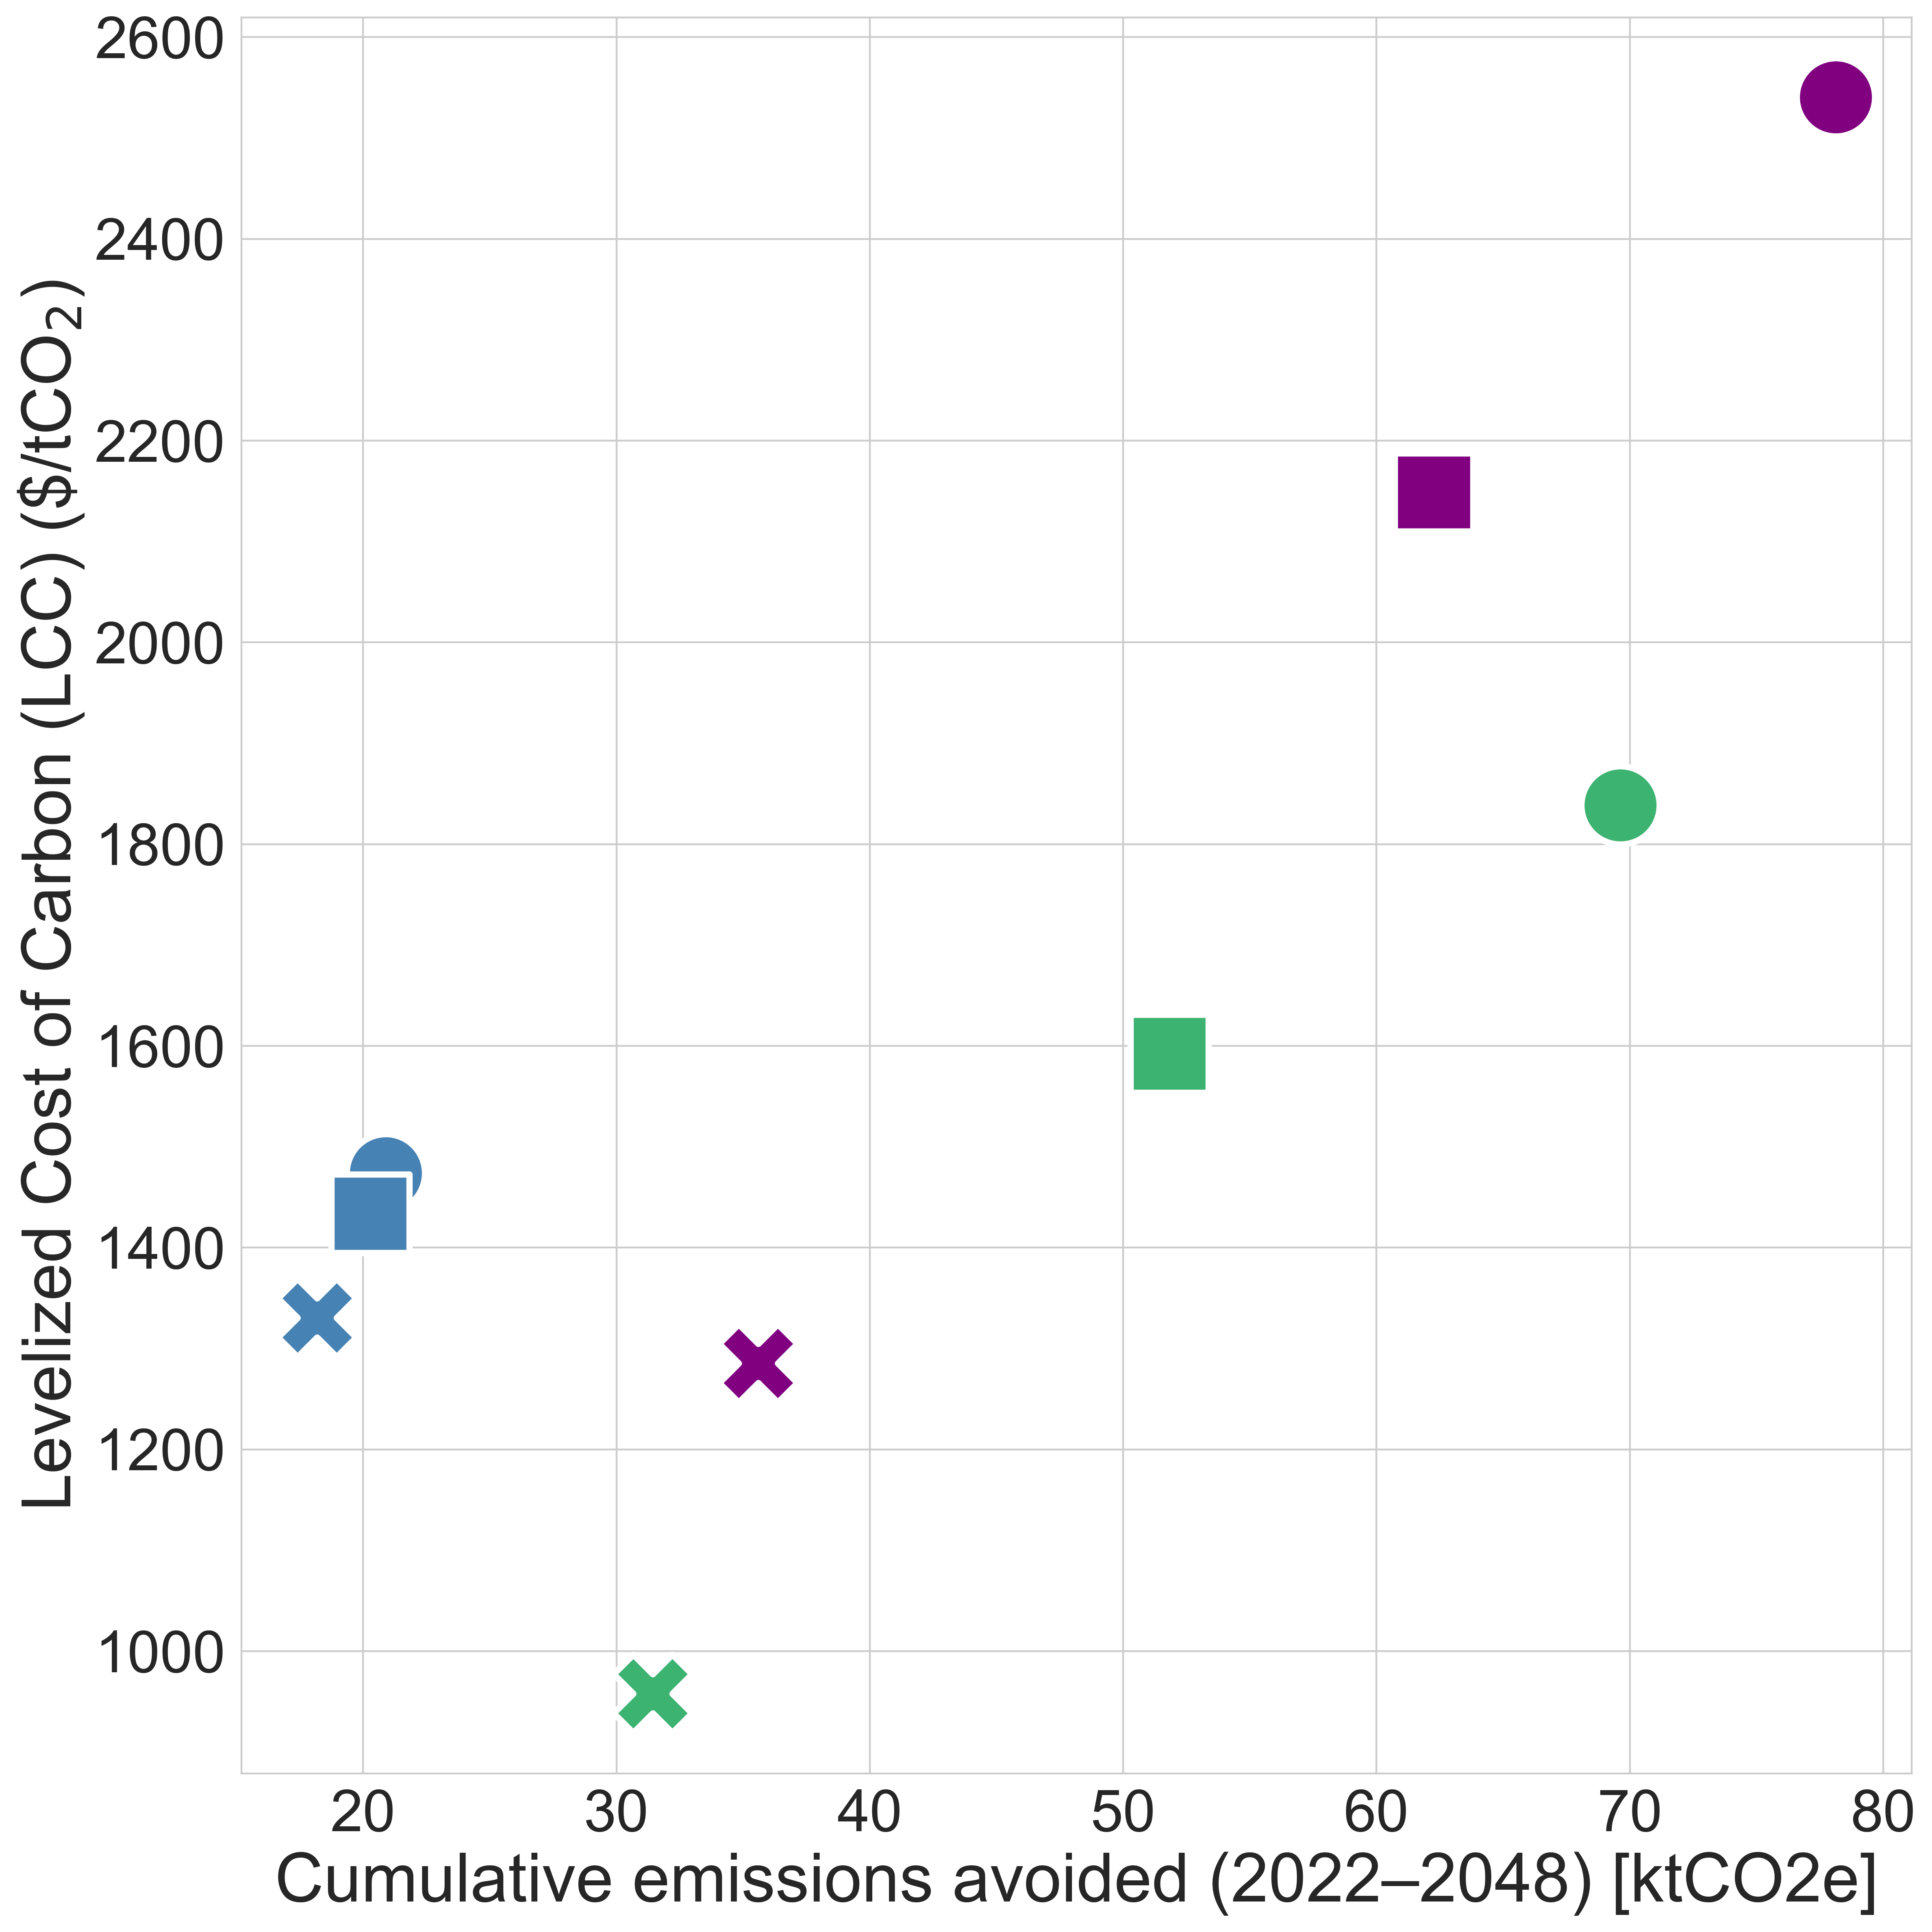

In [295]:
from matplotlib.ticker import FuncFormatter

# Filter out Status quo futures
plot_df = df_results[~df_results['future'].str.contains('Status quo')].copy()

# Extract Scenario and Strategy from 'future' column
plot_df['Scenario'] = plot_df['future'].apply(lambda x: x.split()[0])  # lo-cap, mid-cap, hi-cap
plot_df['Strategy'] = plot_df['future'].apply(lambda x: ' '.join(x.split()[1:]))  # Hybrid, Hybrid+Electric, Electric

# Define custom colors and markers
colors = {
    'Hybrid': 'steelblue',
    'Hybrid+Electric': 'purple',
    'Electric': 'mediumseagreen'
}

markers = {
    'lo-cap': 'X',
    'mid-cap': 's',
    'hi-cap': 'o'
}

# Plot
plt.figure(figsize=(12, 12), dpi=400)

sns.set_style("whitegrid")

# Seaborn scatterplot
sns.scatterplot(
    data=plot_df,
    x='AE_emissions_horizon_posthorizon',
    y='LCC',
    hue='Strategy',
    style='Scenario',
    hue_order=colors.keys(),
    palette=colors,
    markers=markers,
    zorder=3,
    s=1200  # Marker size
)

## Annotate each point with the future label
#for idx, row in plot_df.iterrows():
#    plt.text(
#        row['Total_Avoided_Emissions'] + 1.5,  # Slight x-offset
#        row['LCC'],
#        row['future'],
#        fontsize=14
#    )

ax = plt.gca()  # Get current axis

# Apply custom formatter to divide by 1000
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1000:.0f}'))


# Axes labels
#plt.xlabel('Cumulative emissions avoided (ktCO$_2$)', fontsize=30)
plt.xlabel('Cumulative emissions avoided (2022–2048) [ktCO2e]', fontsize=30)

plt.ylabel('Levelized Cost of Carbon (LCC) (\$/tCO$_2$)', fontsize=30)

# Tick sizes
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

# Axis limits (optional; you can adjust these if needed)
#plt.ylim(0, plot_df['LCC'].max() * 1.2)
#plt.xlim(plot_df['AE_emissions_horizon_posthorizon'].min() * 0.9, plot_df['AE_emissions_horizon_posthorizon'].max() * 1.1)

## Legend outside plot area
#plt.legend(
#    title='',
#    bbox_to_anchor=(0.01, 0.99),  # Move it closer to the edge (x=0.99, y=0.99)
#    loc='upper left',
#    borderaxespad=0.1,
#    fontsize=24,
#    markerscale=0.9,
#    frameon=True  # Optional: turn legend box on/off
#)
plt.legend().remove()



#plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()

# Save figure (optional)
plt.savefig('LCC_vs_AvoidedEmissions_updated_clean.png', bbox_inches='tight', dpi=400)

plt.show()


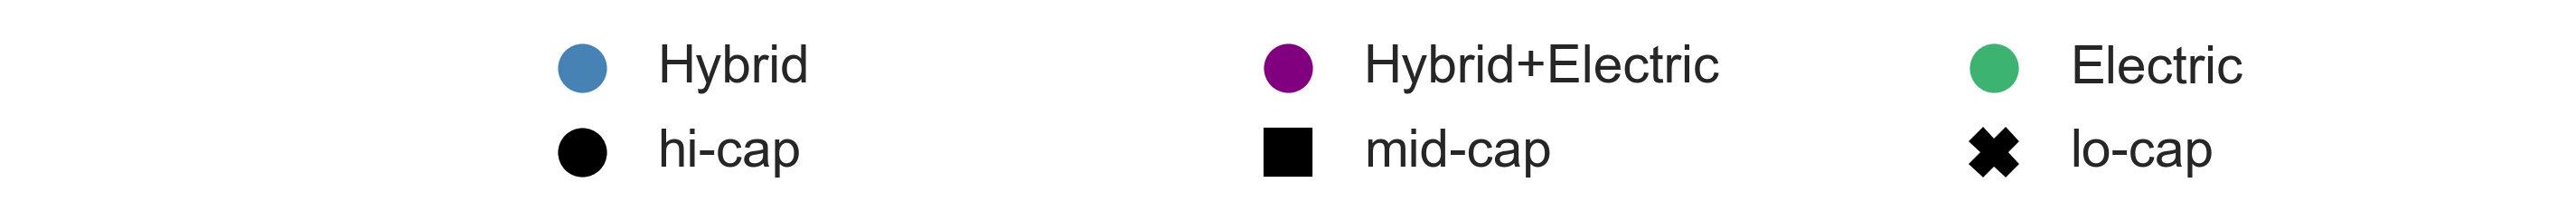

In [296]:
import matplotlib.pyplot as plt

# Define colors and markers
category_colors = {
    "Hybrid": "steelblue",
    "Hybrid+Electric": "purple",
    "Electric": "mediumseagreen"
}
capacity_markers = {
    "hi-cap": "o",
    "mid-cap": "s",
    "lo-cap": "X"
}

# Create a compact figure
fig, ax = plt.subplots(figsize=(12, 0.8), dpi=300)
ax.axis("off")

# Use axes coordinates (0 to 1) for tight layout
spacing = 0.28

# Compute total width of items and center them
num_items = max(len(category_colors), len(capacity_markers))
total_width = (num_items - 1) * spacing
x_start = 0.5 - total_width / 2

# Add color-based legend (top row)
for i, (label, color) in enumerate(category_colors.items()):
    x = x_start + i * spacing
    ax.plot(x, 0.75, marker='o', color=color, markersize=12, transform=ax.transAxes)
    ax.text(x + 0.03, 0.75, label, fontsize=14, va='center', ha='left', transform=ax.transAxes)

# Add marker-based legend (bottom row)
for i, (label, marker) in enumerate(capacity_markers.items()):
    x = x_start + i * spacing
    ax.plot(x, 0.25, marker=marker, color='black', markersize=12, transform=ax.transAxes)
    ax.text(x + 0.03, 0.25, label, fontsize=14, va='center', ha='left', transform=ax.transAxes)

plt.show()


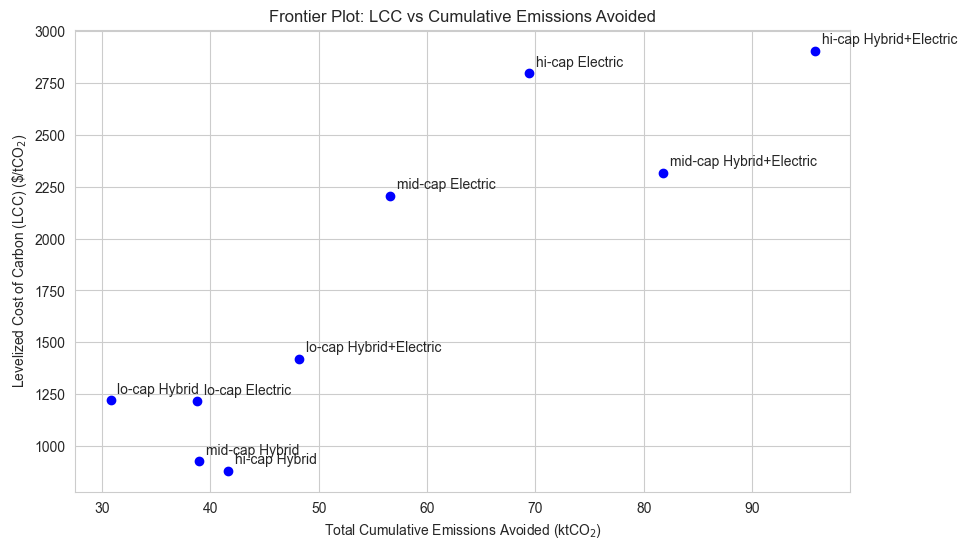

In [27]:
# Data
futures = [
    "lo-cap Hybrid",
    "mid-cap Hybrid",
    "hi-cap Hybrid",
    "lo-cap Hybrid+Electric",
    "mid-cap Hybrid+Electric",
    "hi-cap Hybrid+Electric",
    "lo-cap Electric",
    "mid-cap Electric",
    "hi-cap Electric"
]

cumulative_cost = [37.6, 36.2, 35.7, 68.5, 189.6, 278.4, 47.2, 124.9, 194.3]  # Not used in this plot
avoided_emissions = [30.8, 39.0, 41.6, 48.2, 81.8, 95.8, 38.8, 56.6, 69.4]    # x-axis
lcc = [1221, 928, 881, 1421, 2318, 2906, 1216, 2207, 2799]                    # y-axis

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(avoided_emissions, lcc, color='blue')

# Annotate each point with the future name
for i, label in enumerate(futures):
    plt.annotate(label, (avoided_emissions[i], lcc[i]), textcoords="offset points", xytext=(5,5), ha='left')

# Axis labels and title
plt.xlabel('Total Cumulative Emissions Avoided (ktCO$_2$)')
plt.ylabel('Levelized Cost of Carbon (LCC) (\$/tCO$_2$)')
plt.title('Frontier Plot: LCC vs Cumulative Emissions Avoided')
plt.grid(True)

# Optionally invert the x-axis if you want more emissions on the right
# plt.gca().invert_xaxis()

plt.show()


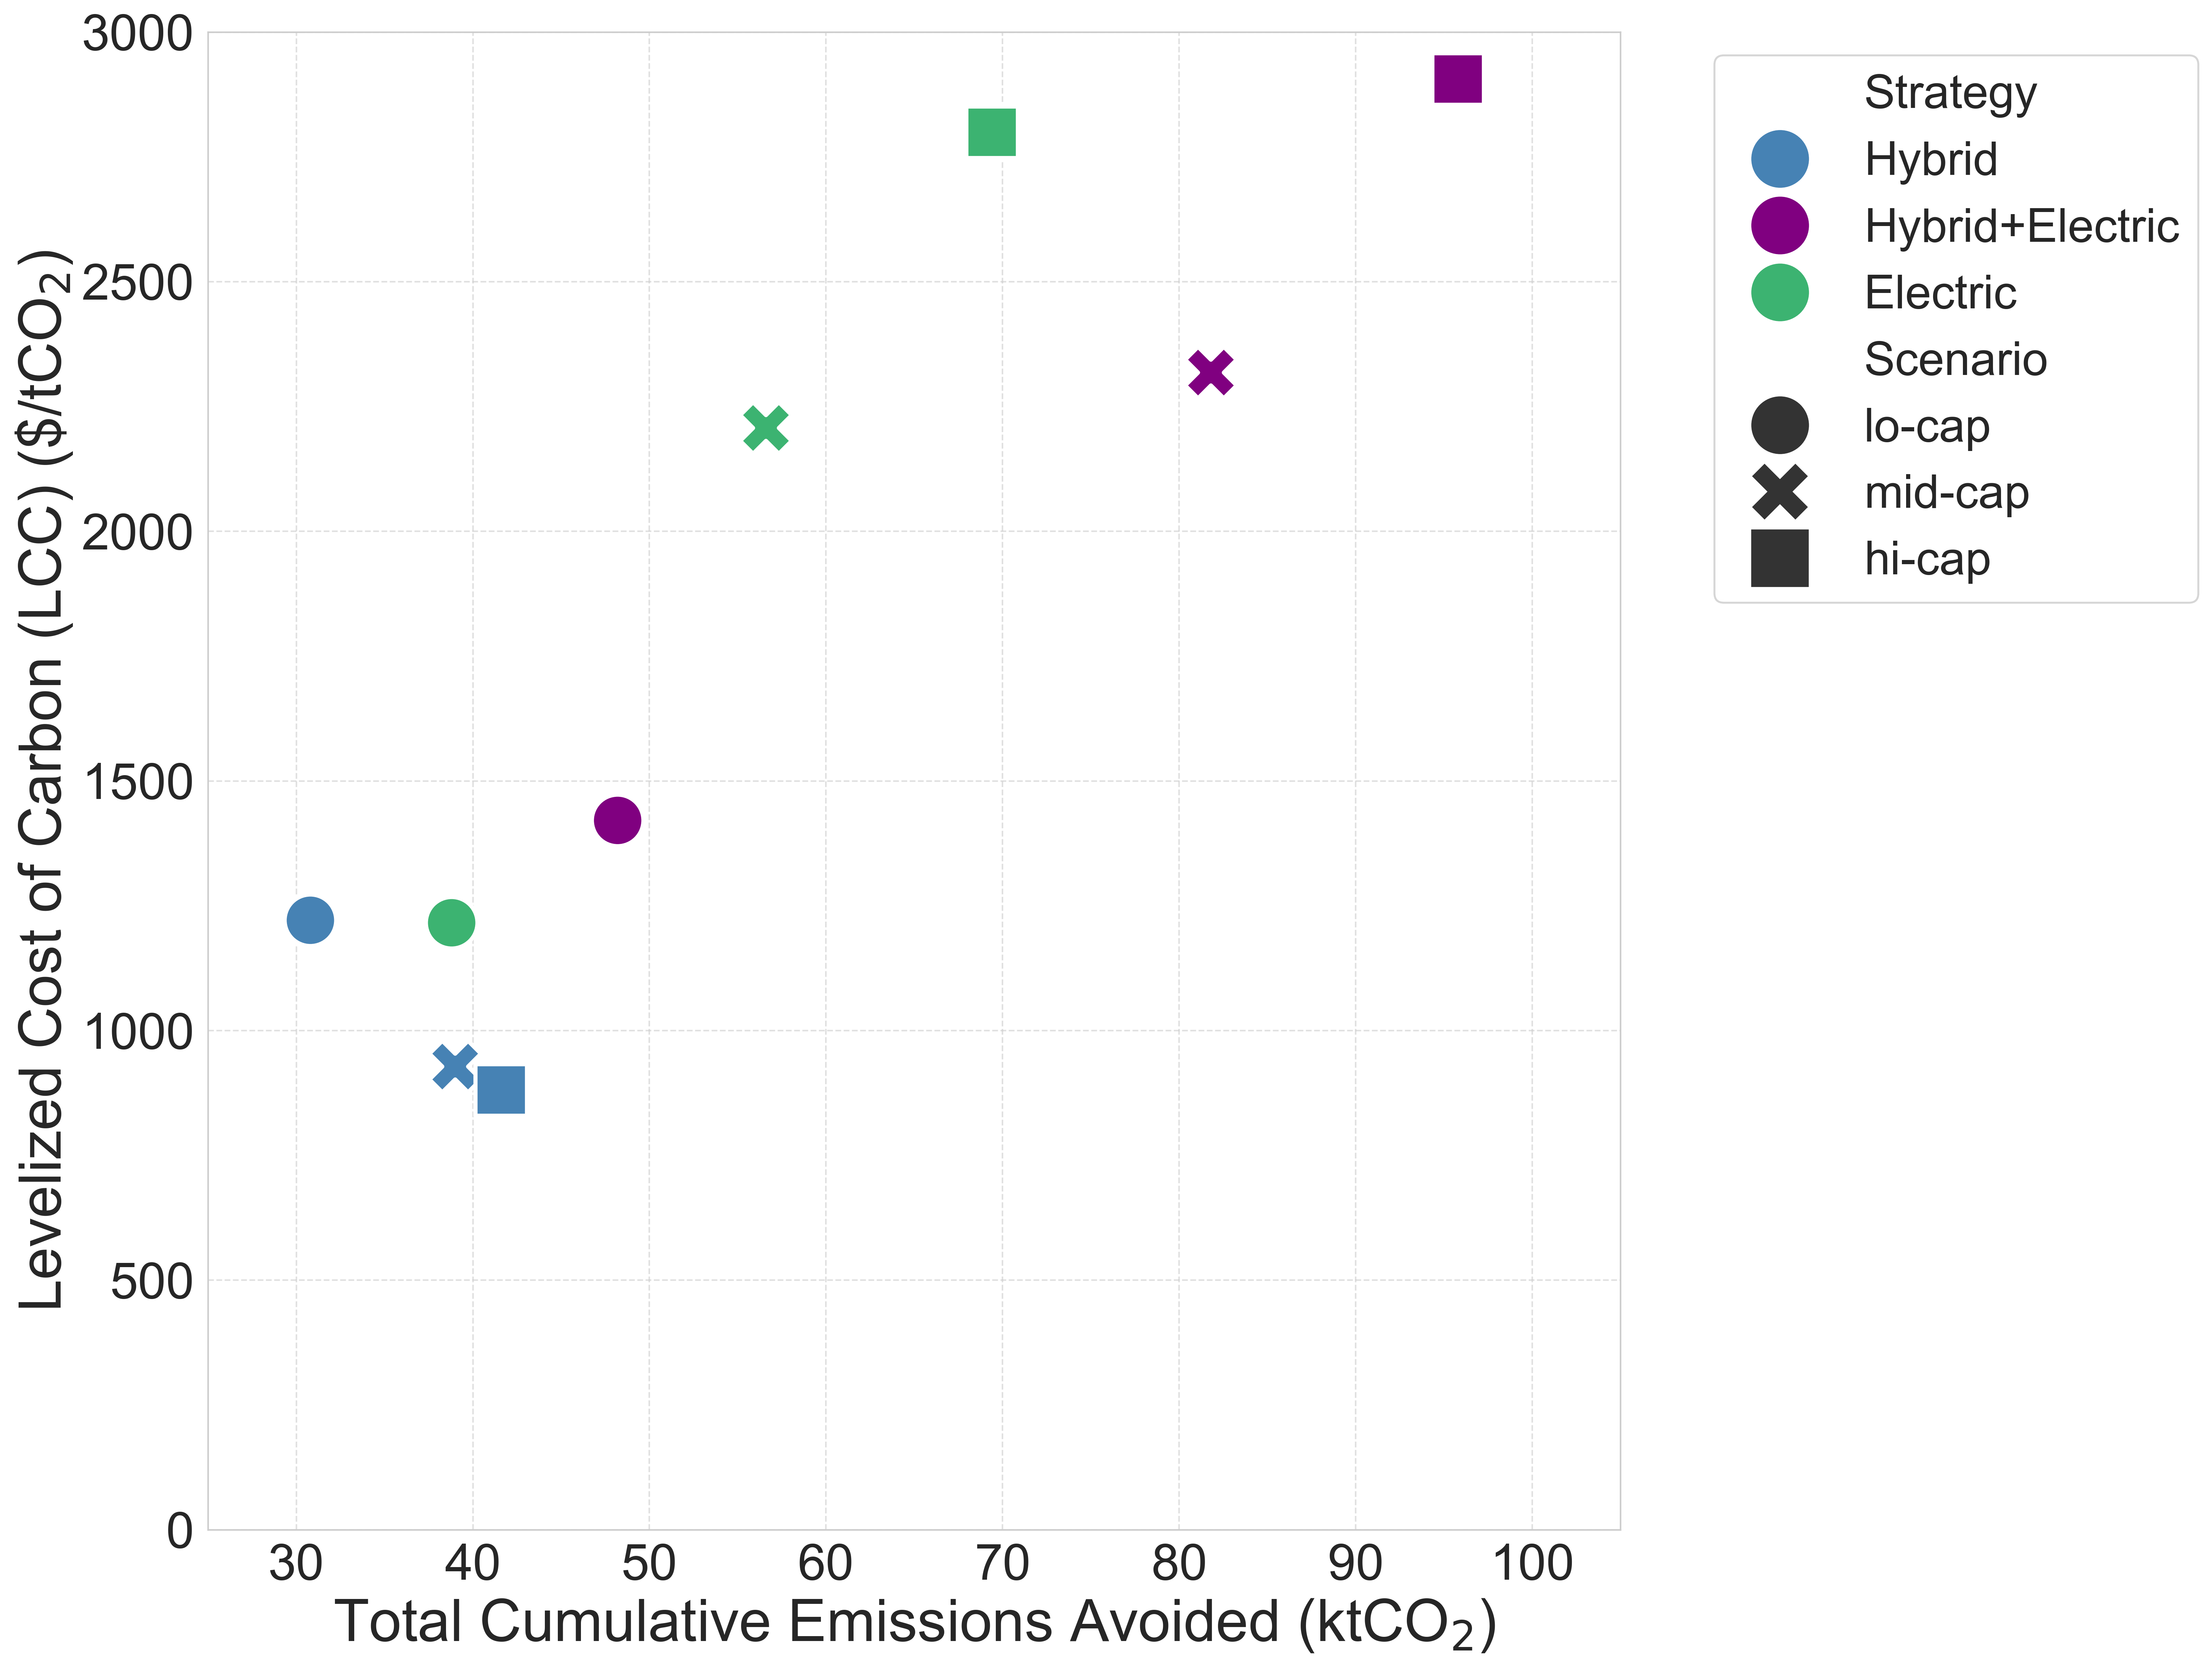

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data from your table
data = {
    'Electrification Future': [
        'lo-cap Hybrid',
        'mid-cap Hybrid',
        'hi-cap Hybrid',
        'lo-cap Hybrid+Electric',
        'mid-cap Hybrid+Electric',
        'hi-cap Hybrid+Electric',
        'lo-cap Electric',
        'mid-cap Electric',
        'hi-cap Electric'
    ],
    'Cumulative Cost': [37.6, 36.2, 35.7, 68.5, 189.6, 278.4, 47.2, 124.9, 194.3],
    'Avoided Emissions': [30.8, 39.0, 41.6, 48.2, 81.8, 95.8, 38.8, 56.6, 69.4],
    'LCC': [1221, 928, 881, 1421, 2318, 2906, 1216, 2207, 2799]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Extract Scenario and Strategy
df['Scenario'] = df['Electrification Future'].apply(lambda x: x.split()[0])  # lo-cap, mid-cap, hi-cap
df['Strategy'] = df['Electrification Future'].apply(lambda x: x.split()[1])  # Hybrid, Hybrid+Electric, Electric

# Define custom colors and markers
colors = {
    'Hybrid': 'steelblue',
    'Hybrid+Electric': 'purple',
    'Electric': 'mediumseagreen'
}

markers = {
    'lo-cap': 'o',
    'mid-cap': 'X',
    'hi-cap': 's'
}

# Plot
plt.figure(figsize=(16, 12), dpi=400)

# Set the style to whitegrid
sns.set_style("whitegrid")

# Seaborn scatterplot
sns.scatterplot(
    data=df,
    x='Avoided Emissions',
    y='LCC',
    hue='Strategy',
    style='Scenario',
    hue_order=colors.keys(),
    palette=colors,
    markers=markers,
    zorder=3,
    s=700  # Marker size
)

## Annotate each point with the Electrification Future label
#for idx, row in df.iterrows():
#    plt.text(
#        row['Avoided Emissions'] + 1.5,  # Slight x-offset
#        row['LCC'],
#        row['Electrification Future'],
#        fontsize=14
#    )

# Axes labels
plt.xlabel('Total Cumulative Emissions Avoided (ktCO$_2$)', fontsize=30)
plt.ylabel('Levelized Cost of Carbon (LCC) (\$/tCO$_2$)', fontsize=30)

# Tick sizes
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

# Set axis limits for better focus (optional, adjust as needed)
plt.ylim(0, 3000)
plt.xlim(25, 105)

# Legend
#plt.legend(
#    title='',
#    #bbox_to_anchor=(1.05, 1),
#    loc='lower right',
#    borderaxespad=0.5,
#    fontsize=24,
#    title_fontsize=30,
#    markerscale=1.2
#)

plt.legend(
    title='',
    bbox_to_anchor=(1.05, 1),  # Pushes the legend outside the axes to the right
    loc='upper left',           # Anchor point inside the legend box
    borderaxespad=0.5,
    fontsize=24,
    title_fontsize=30,
    markerscale=1.2
)


plt.grid(True, linestyle='--', alpha=0.6)

# Tight layout for spacing
plt.tight_layout()

# Save figure (optional)
plt.savefig('LCC_vs_AvoidedEmissions_frontier_improved.png', bbox_inches='tight', dpi=400)

plt.show()
